# Praca domowa 2

## Wczytanie danych

In [1]:
import numpy as np
import pandas as pd
import category_encoders as ce
import random
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.impute import KNNImputer
import seaborn as sns
random.seed(123)

In [2]:
df = pd.read_csv('https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1')
# zobaczmy jak wygląda zbiorek
df.head(6)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
5,5,2016-04-03 16:31:01,4790991674,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,"Odzież, Obuwie, Dodatki"


I jego rozmiar

In [3]:
df.shape

(420020, 14)

## Kodowanie zmiennych kategorycznych

Kodować będziemy zmienną 'it_location' z ~10k unikatowymi wartościami.

In [4]:
df[['it_location']].squeeze().value_counts()

Warszawa             23244
Kraków               15135
Łódź                 10935
Poznań               10610
Wrocław               8646
                     ...  
Aleksandria Druga        1
Kadłubiec                1
czaniec                  1
0                        1
Kosobudy                 1
Name: it_location, Length: 10056, dtype: int64

### One Hot Encoder

In [5]:
encoder = ce.OneHotEncoder(cols = 'it_location')

#żeby nie trwało to bardzo długo i żeby starczyło pamięci będziemy testować na pierwszych 20 wierszach
encoder.fit_transform(df.loc[1:20,'it_location']).head()

,it_location_1,it_location_2,it_location_3,it_location_4,it_location_5,it_location_6,it_location_7,it_location_8,it_location_9,it_location_10,it_location_11,it_location_12,it_location_13,it_location_14,it_location_15,it_location_16
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.loc[1:20,'it_location'].value_counts()

Warszawa                      3
GĄBIN                         2
WROCŁAW                       2
Internet                      1
Legionowo                     1
PRZYLEP KOŁO ZIELONEJ GÓRY    1
zachodniopomorskie            1
PACZKA KURIER                 1
Wola Krzysztoporska           1
Rzeszów                       1
Jarosław                      1
Zabrze                        1
BIAŁYSTOK                     1
Tuchola                       1
Leszno                        1
ŚWIĘTOCHŁOWICE                1
Name: it_location, dtype: int64

### Polynomial Encoder
Działa przez dopasowanie wielomianów czwartego stopnia. Podobnie jak one hot zwraca tyle kolumn ile jest klas, co w przypadku dużego zbioru jak ten bardzo kosztowne.

In [7]:
encoder = ce.PolynomialEncoder(cols = 'it_location')

encoder.fit_transform(df.loc[1:20,'it_location']).head()

,intercept,it_location_0,it_location_1,it_location_2,it_location_3,it_location_4,it_location_5,it_location_6,it_location_7,it_location_8,it_location_9,it_location_10,it_location_11,it_location_12,it_location_13,it_location_14
1,1,-0.406745,0.463099,-0.453245,0.398089,-0.318524,0.233457,-0.156869,0.096418,-0.053937,0.027240,-0.012268,0.004834,-0.001616,0.000432,-0.000080
2,1,-0.352512,0.277859,-0.090649,-0.132696,0.318524,-0.420222,0.428776,-0.366387,0.269685,-0.172521,0.095689,-0.045441,0.017990,-0.005621,0.001204
3,1,-0.298279,0.119083,0.142448,-0.322263,0.318524,-0.140074,-0.115037,0.327820,-0.423791,0.398225,-0.297582,0.180799,-0.088440,0.033293,-0.008431
4,1,-0.244047,-0.013231,0.265970,-0.293099,0.073506,0.211907,-0.340286,0.221019,0.056308,-0.315207,0.427270,-0.379967,0.247869,-0.118041,0.036533
5,1,-0.189814,-0.119083,0.299839,-0.147279,-0.171513,0.312473,-0.126300,-0.197285,0.340811,-0.172521,-0.158780,0.399304,-0.418717,0.275428,-0.109598


### Ordinal encoder
Nadaje kolejnym unikatowym wartościom kolejne inty zaczynając od 1. 

In [8]:
encoder = ce.OrdinalEncoder(cols = 'it_location')

it_loc_ord = encoder.fit_transform(df.loc[:,'it_location'])

Zwraca tylko jedną kolumnę, która zamiast stringów ma inty, co ma swoje plusy, jak i minusy - lepiej operować na liczbach niż stringach, ale bez przetworzenia danych wcześniej 'WARSZAWA', 'Warszawa','Warszawa Wola', 'Warszawa/ Sprzedaż tylko wysyłkowa' stają się różnymi miejscami.

In [9]:
df[['it_location']].squeeze().value_counts().filter(regex='^(wa|Wa|WA)').head(10)

Warszawa                              23244
WARSZAWA                               2672
warszawa                               1123
Wadowice                                449
Warszawa/ Sprzedaż tylko wysyłkowa      333
Wałbrzych                               236
Warszawa, Katowice                      146
Wałcz                                   138
Warszawa-Halinów                        123
Wasilków                                104
Name: it_location, dtype: int64

Poza tym encoder nie robi nic specjalnego, po prostu numeruje po kolei lokacje

In [10]:
it_loc_ord.squeeze().value_counts()

1       23244
61      15135
22      10935
36      10610
34       8646
        ...  
6878        1
8289        1
9177        1
7783        1
4221        1
Name: it_location, Length: 10056, dtype: int64

## Uzupełnianie braków

In [11]:
df = pd.read_csv('./allegro-api-transactions.csv')

df = df[['price', 'it_seller_rating', 'it_quantity']]

imputer = KNNImputer(n_neighbors=20, weights="uniform")

# dodatkowo zmiejszymy zbiór do 10k obserwacji
df = df.sample(10**4)

df_saved = df.copy()

# funkcja na zastępowanie 10% danych kolumn brakami
def get_msre(columns, imputer = imputer):
    df = df_saved.copy()

    slice_tab = [random.sample(range(df.shape[0]), round(df.shape[0] * 0.1)) for _ in range(len(columns))]
    
    for i in range(len(columns)):
        df.iloc[slice_tab[i],columns[i]] = np.nan
    
    x = imputer.fit_transform(df)
    err = sqrt(mean_squared_error(df_saved, x))
    return err

### Usunięcie 10% kolumn it_seller_rating

In [12]:
err = get_msre([1])
print('Pojedyńczy MSRE dla KNNImputer = {}'.format(err))

Pojedyńczy MSRE dla KNNImputer = 8754.759158685369


In [13]:
err_tab_1 = [get_msre([1]) for _ in range(10)]

Odchylenie standardowe dla 10 pomiarów dla usuniętych 10% it_seller_rating:

In [14]:
np.std(err_tab_1)

389.96271744855267

### Usunięcie 10% kolumn it_seller_rating i it_quantity

In [15]:
err_tab_2 = [get_msre([1,2]) for _ in range(10)]

Odchylenie standardowe dla usuniętych 10% procent z it_seller_rating it_quantity:

In [16]:
np.std(err_tab_2)

462.74937046281167

### Podsumowanie

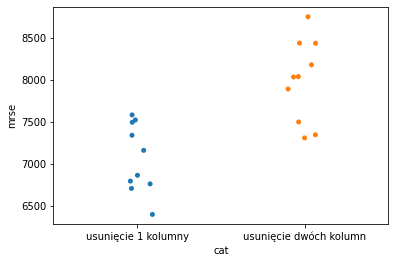

In [17]:
dff = pd.DataFrame({'mrse': err_tab_1 + err_tab_2 , 'cat': ['usunięcie 1 kolumny']*10 + ['usunięcie dwóch kolumn'] * 10})
sns.stripplot(y='mrse', x='cat', data=dff)

Odchylenia standardowe są porównywalne w obu przypadkach, jednak usunięcie z dwóch kolumn osiąga wyższe błędy niż tylko z jednej.

Zobaczmy jeszcze jak ma się parametr n_neighbors:

In [18]:
k_n = [i for i in range(1,40)]
k_n_err = [get_msre([1], KNNImputer(n_neighbors=i, weights="uniform")) for i in range(1,40)]

[Text(0, 0.5, 'msre'), Text(0.5, 0, 'Ilość sąsiadów')]

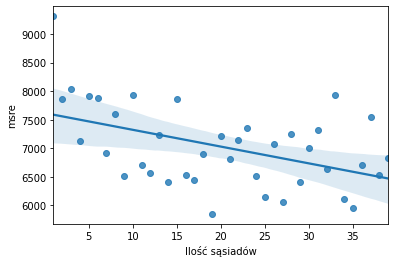

In [19]:
ax = sns.regplot(x=k_n, y = k_n_err, fit_reg=True) 
ax.set(xlabel='Ilość sąsiadów', ylabel='msre')

Jak można było się spodziewać im więcej sąsiadów tym lepiej.